# Support Vector Machines

Let's create the same fake income / age clustered data that we used for our K-Means clustering example:

In [1]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

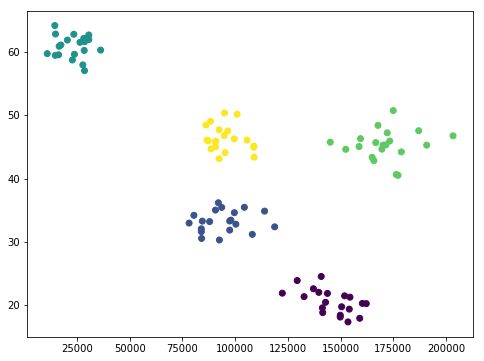

In [2]:
%matplotlib inline
from pylab import *

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [3]:
from sklearn import svm, datasets

C = 2.0 #to avoid miss classification we use C . Large value if C can also lead to overfitting
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

**numpy.ravel:-return a contiguous flattened array. 

x=np.array([[1,2,3],[4,5,6]])
print(np.ravel(x))
[1,2,3,4,5,6]

**np.c_ :- Translates slice object to concatenation along the second axis. #(column wise)

np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1,4],
       [2,5],
       [3,6]])

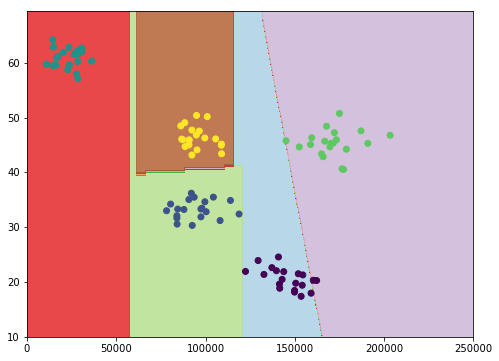

In [8]:
#meshgrid converts array into matrix
# both xx and yy are of same dimension (see notebook)
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.show()
    
plotPredictions(svc)

Or just use predict for a given point:

In [18]:
print(svc.predict([[200000, 40]]))

[3]


In [19]:
print(svc.predict([[50000, 65]]))

[4]


## Activity

"Linear" is one of many kernels scikit-learn supports on SVC. Look up the documentation for scikit-learn online to find out what the other possible kernel options are. Do any of them work well for this data set?